In [539]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [540]:
data2=pd.read_csv("ex2data2.txt",names=["Test1","Test2","Accepted"])
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


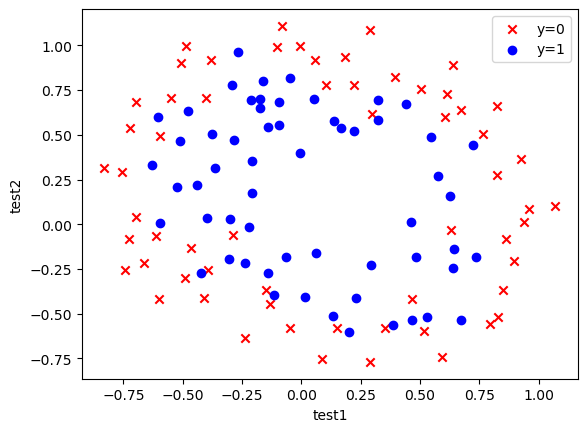

In [541]:
fig,ax=plt.subplots()
ax.scatter(data2[data2["Accepted"]==0]["Test1"],data2[data2["Accepted"]==0]["Test2"],c="r",marker="x",label="y=0")
ax.scatter(data2[data2["Accepted"]==1]["Test1"],data2[data2["Accepted"]==1]["Test2"],c="b",marker="o",label="y=1")
ax.legend()#display label
ax.set(xlabel="test1",ylabel="test2")
plt.show()

In [542]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [543]:
def get_Xy(data):
    data.insert(0,"ones",1)
    X_=data.iloc[:,0:-1]
    X=X_.values
    
    y_=data.iloc[:,-1]
    y=y_.values.reshape(len(y_),1)
    return X,y

### 特征映射,对于不可线性二分的

In [545]:
def feature_mapping(x1,x2,power):
    data={}
    
    for i in np.arange(power+1):
        for j in np.arange(i+1):
            data["F{}{}".format(i-j,j)]=np.power(x1,i-j)*np.power(x2,j)
    return pd.DataFrame(data)



In [546]:
x1=data2["Test1"]
x2=data2["Test2"]

In [547]:
data2_=feature_mapping(x1,x2,6)

In [548]:
data2_.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [549]:
X = data2_.values

In [550]:
X.shape

(118, 28)

In [551]:
y=data2.iloc[:,-1].values

In [552]:
y=y.reshape(len(y),1)

In [553]:
y.shape

(118, 1)

In [554]:
def costFunction(X,y,theta,lam):
    y_hat=sigmoid(X@theta)
    first=y*np.log(y_hat)
    second =(1-y)*np.log(1-y_hat)
    reg=np.sum(np.power(theta[1:],2))*(lam/(2*len(X)))
    return -(np.sum(first+second))/len(X)+reg 

In [555]:
theta=np.zeros((28,1))
theta.shape


(28, 1)

In [556]:
lam=1
cost_init=costFunction(X,y,theta,lam)
print(cost_init)

0.6931471805599454


In [557]:
def gradientDescent(X,y,theta,alpha,iters,lamda):
    
    costs = []
    
    for i in range(iters):
        
        reg = theta[1:] * (lamda / len(X))
        reg = np.insert(reg,0,values=0,axis=0)
        
        theta = theta - (X.T@(sigmoid(X@theta) - y)) * alpha / len(X) -reg*alpha
        cost = costFunction(X,y,theta,lamda)
        costs.append(cost)

        if i % 10000 == 0:
            print(cost)

    return theta,costs

In [568]:
alpha = 0.001
iters = 200000
# lamda = 0.001
lamda = 0.1

In [570]:
theta_final,costs = gradientDescent(X,y,theta,alpha,iters,lamda)
print(theta_final)

0.6931343808043247
0.6242054715271711
0.5852447561637638
0.5567400371087793
0.5345126426727593
0.5166433793068518
0.5019873546940052
0.48977924556496727
0.4794797932411262
0.47069673545813895
0.46313777969451486
0.45658066720189766
0.45085337408129744
0.44582065494051715
0.44137468808577657
0.43742844043667306
0.433910875083166
0.4307634316649655
0.42793740172812317
0.42539194379692075
[[ 1.77801688]
 [ 1.09327317]
 [ 1.88734721]
 [-2.92982917]
 [-1.55518466]
 [-2.01099084]
 [ 0.28906033]
 [-0.6225005 ]
 [-0.58870915]
 [-0.22887858]
 [-2.22511532]
 [-0.12705587]
 [-0.95533794]
 [-0.49070996]
 [-1.81848636]
 [-0.33764396]
 [-0.35756843]
 [-0.07316378]
 [-0.45136146]
 [-0.50381867]
 [-0.7129427 ]
 [-1.63082471]
 [ 0.01612567]
 [-0.46006512]
 [ 0.00605082]
 [-0.51912734]
 [-0.27025891]
 [-1.46464852]]


In [571]:
def predict(X,theta):
    prob=sigmoid(X@theta)
    return [1 if x>=0.5 else 0 for x in prob]

In [572]:
theta_final.shape

(28, 1)

In [573]:
y_=np.array(predict(X,theta_final))
y_pre=y_.reshape(len(y_),1)
acc=np.mean(y_pre==y)
print(acc)

0.8135593220338984


(40000,)
(40000, 28)


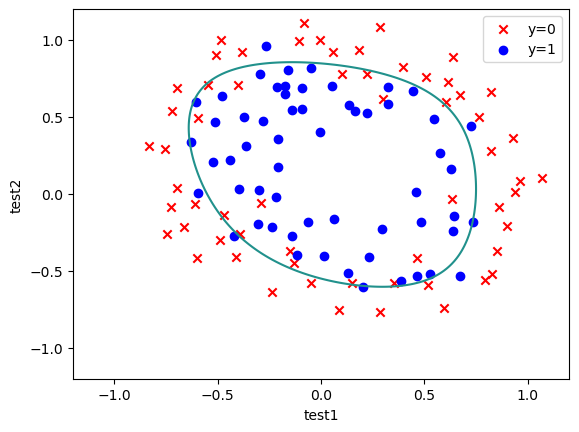

In [574]:
x = np.linspace(-1.2,1.2,200)
xx,yy = np.meshgrid(x,x)
z = feature_mapping(xx.ravel(),yy.ravel(),6).values
print(xx.ravel().shape)
print(z.shape)
zz = z @ theta_final
zz = zz.reshape(xx.shape)

fig,ax=plt.subplots()
ax.scatter(data2[data2["Accepted"]==0]["Test1"],data2[data2["Accepted"]==0]["Test2"],c="r",marker="x",label="y=0")
ax.scatter(data2[data2["Accepted"]==1]["Test1"],data2[data2["Accepted"]==1]["Test2"],c="b",marker="o",label="y=1")
ax.legend()#display label
ax.set(xlabel="test1",ylabel="test2")


plt.contour(xx,yy,zz,0)
plt.show()